In [96]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:80% !important;height:80% !important;}</style>"
HTML(style)

In [101]:
file = pd.read_csv(r'C:\Users\DEMO\Downloads\dogs_n_cats.csv')
# преобразовываем данные - заменяем вид на бинарные значения (номинативные переменные заменяем количественными)
#file = pd.get_dummies(file)

In [102]:
# выкидываем ненужные данные (по столбцам)
X = file.drop(['Вид'], axis=1)


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [103]:
# переменная, которую будем предсказывать
y = file.Вид

In [104]:
# поделили выборки
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [105]:
X_train.shape

(670, 5)

In [106]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [83]:
scores_data.head()

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


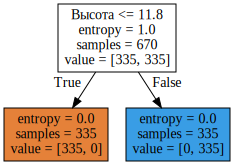

In [92]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X)
                                    ,  filled=True))
display(SVG(graph.pipe(format='svg')))

In [89]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [93]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


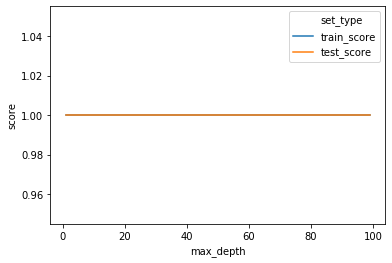

In [94]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [109]:
test_data = pd.read_json(r'C:\Users\DEMO\Downloads\dataset_209691_15.txt')

# (clf.predict(test_data)=='собачка').sum()
clf.predict(test_data).tolist().count('собачка')



47

1.0